In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df=pd.read_csv("spam.csv",encoding='latin1')

In [99]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [100]:
df.shape

(5572, 5)

### 1.DATA CLEANING

In [101]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [102]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [104]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [106]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [107]:
df.sample()

,target,text
4763,ham,Hi.:)technical support.providing assistance to...


In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
encoder=LabelEncoder()

In [110]:
df['target']=encoder.fit_transform(df['target'])

In [111]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df.duplicated().sum()

403

In [113]:
df.drop_duplicates(keep='first',inplace=True)

In [114]:
df.duplicated().sum()

0

### 2.Exploratory Data Analysis

In [115]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

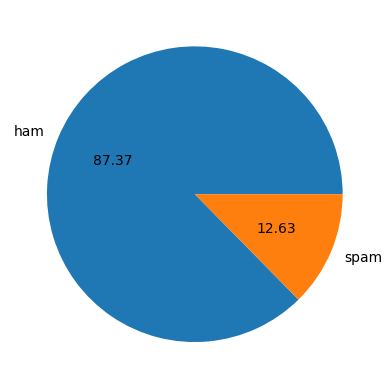

In [116]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

#### * Data is Imbalanced

In [117]:
import nltk

In [118]:
df['num_characters']=df['num_characters']=df['text'].apply(lambda x : len(x))

In [119]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [120]:
df['num_sents']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [121]:
df[df['target']==0][['num_words','num_sents','num_characters']].describe()

,num_words,num_sents,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [122]:
df[df['target']==1][['num_words','num_sents','num_characters']].describe()

,num_words,num_sents,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


<Axes: xlabel='num_characters', ylabel='Count'>

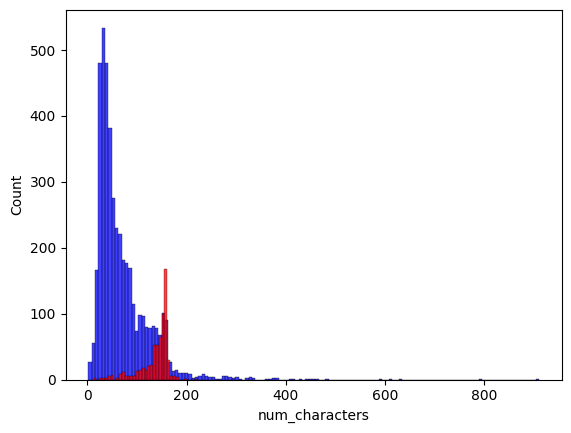

In [123]:
sns.histplot(df[df['target']==0]['num_characters'],color='blue')
sns.histplot(df[df['target']==1]['num_characters'],color='red')


In [124]:
df[['target','num_words','num_sents','num_characters']].corr()

,target,num_words,num_sents,num_characters
target,1.000000,0.262912,0.263939,0.384717
num_words,0.262912,1.000000,0.679971,0.965760
num_sents,0.263939,0.679971,1.000000,0.624139
num_characters,0.384717,0.965760,0.624139,1.000000


<Axes: >

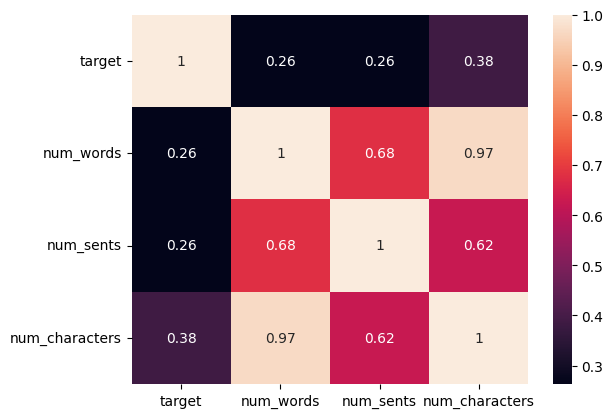

In [125]:
sns.heatmap(df[['target','num_words','num_sents','num_characters']].corr(),annot=True)

### 3.Text Preprocessing

In [126]:
from nltk.corpus import stopwords
import string

In [127]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [128]:
def transform_text(text) :
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
        
    
    return " ".join(y)


In [129]:
df['transformed_text']=df['text'].apply(lambda x : transform_text(x))

In [130]:
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=400,min_font_size=10)

In [132]:
spam_word=wc.generate(df[df['target']==1]["transformed_text"].str.cat(sep=" "))

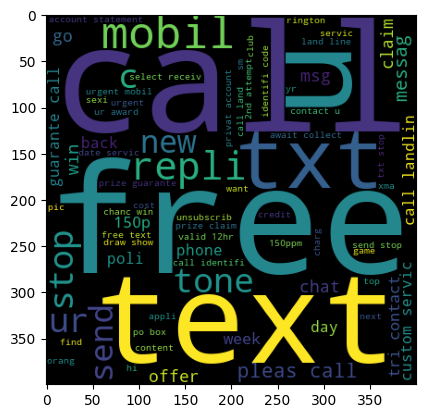

In [133]:
plt.imshow(spam_word)

In [134]:
ham_word=wc.generate(df[df['target']==0]["transformed_text"].str.cat(sep=" "))

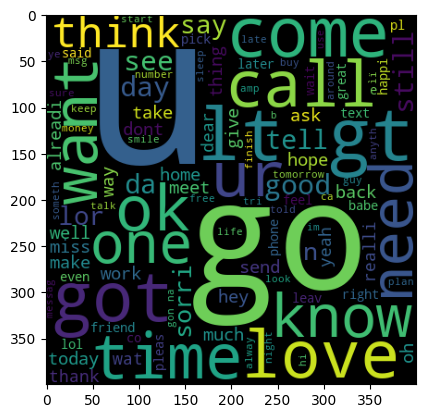

In [135]:
plt.imshow(ham_word)

In [136]:
spam_corpus=[]
for word in df[df['target']==1]['transformed_text'].tolist() :
    for msg in word.split():
        spam_corpus.append(msg)
        

In [137]:
from collections import Counter

In [138]:
df1=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['words','count'])

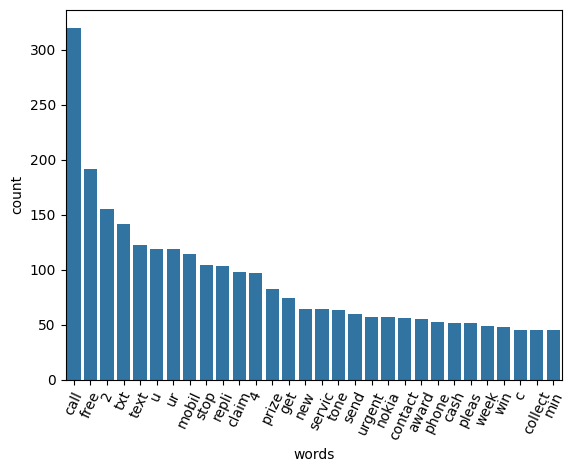

In [139]:
sns.barplot(x='words',y='count',data=df1)
plt.xticks(rotation=65)
plt.show()

In [140]:
ham_corpus=[]
for word in df[df['target']==0]['transformed_text'].tolist() :
    for msg in word.split():
        ham_corpus.append(msg)
        

In [141]:
df2=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['words','count'])

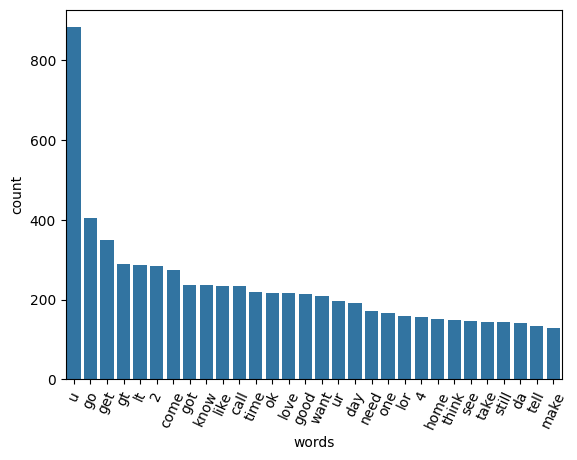

In [142]:
sns.barplot(x='words',y='count',data=df2)
plt.xticks(rotation=65)
plt.show()

### 4. Model Building

In [218]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [219]:
tfidf = TfidfVectorizer(max_features=3000)

In [220]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [221]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
X.shape

(5169, 3000)

In [223]:
y=df['target'].values

In [224]:
y.shape

(5169,)

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [227]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [228]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [229]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [230]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [231]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [232]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [233]:
kn = KNeighborsClassifier()
mn = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
rc = RandomForestClassifier(n_estimators=50,random_state=2)

In [234]:
clfs={
    'KN':kn,
    'MNB':mn,
    'ETC':etc,
    'RC':rc,
}

In [235]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    


        
        
        

In [236]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  RC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


In [237]:
df4=pd.DataFrame({'Algorithm ':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores}).sort_values(by='precision',ascending=False)

In [238]:
df4

,Algorithm,accuracy,precision
0,KN,0.905222,1.000000
1,MNB,0.970986,1.000000
3,RC,0.975822,0.982906
2,ETC,0.974855,0.974576


In [239]:
kn = KNeighborsClassifier()
mn = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [240]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('KN',kn),('MNB',mnb),('ETC',etc)],voting='soft')

In [241]:
vc.fit(X_train,y_train)
vc_pred=vc.predict(X_test)
print("Accuracy",accuracy_score(y_test,vc_pred))
print("Precision",precision_score(y_test,vc_pred))

Accuracy 0.9593810444874274
Precision 1.0


In [242]:
import pickle

In [243]:
pickle.dump(tfidf,open('vect.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))